#### What it does:

###### It leverages the built-in feature importance mechanism of Random Forest models.
###### It measures how much each feature contributes to the model's predictive power.

#### Why it's useful:

###### Provides a simple and effective way to rank features by their importance.
###### Helps you understand which features are most relevant to your target variable.
###### Can be used for feature selection to improve model performance and interpretability.
###### Works for both classification and regression problems.

### Mathematical Formula:

#### Random Forest Importance is calculated based on two main approaches:

##### Mean Decrease in Impurity (MDI):

###### For each decision tree in the forest, calculate the total decrease in impurity (e.g., Gini impurity or information gain) caused by splits on a particular feature.
###### Average these decreases across all trees in the forest.
###### The higher the average decrease in impurity, the more important the feature is considered.
##### Mean Decrease in Accuracy (MDA):

###### Permute the values of a feature in the out-of-bag (OOB) samples and measure the decrease in the model's accuracy.
###### Average these decreases across all trees in the forest.
###### The higher the average decrease in accuracy, the more important the feature is considered.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [12]:
# We select MinMaxScaled data, because it gives more accuracy and less loss, despite too little latencycompared to StandardScaling
df = pd.read_csv("C:/Users/DilshodbekMX/PycharmProjects/Cyber/Normalization/MinMaxScaling.csv", low_memory=False)
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0.000000,0.091080,0.328101,0.239987,0.794107,0.604403,0.006760,0.352941,0.246193,...,0.454545,0.001253,0.002184,0.004293,0.000644,0.083017,0.001615,0.083439,0.081228,1
1,1,0.000006,0.624611,0.245482,0.288850,0.791299,0.223591,0.000809,1.000000,0.214860,...,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,2,0.000012,0.032264,0.084343,0.446652,0.521897,0.214884,0.006760,0.352941,0.083647,...,0.000000,0.000618,0.001209,0.003237,0.000379,0.080068,0.021086,0.083531,0.043356,1
3,3,0.000017,0.297427,0.640548,0.300064,0.001221,0.328405,0.576220,0.352941,0.167571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,4,0.000023,0.445803,0.010234,0.170939,0.794717,0.261212,0.051714,0.352941,0.905422,...,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [13]:
X = df.drop("Label", axis=1)  # Features
y = df["Label"]

In [14]:
# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [15]:

# Get feature importances
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

In [16]:

# Create a DataFrame for feature importances
forest_importances = pd.Series(importances, index=X.columns)
std = np.std([
    tree.feature_importances_ for tree in model.estimators_], axis=0)

In [17]:
# Sort the DataFrame in descending order of importance
forest_importances = forest_importances.sort_values(ascending=False)

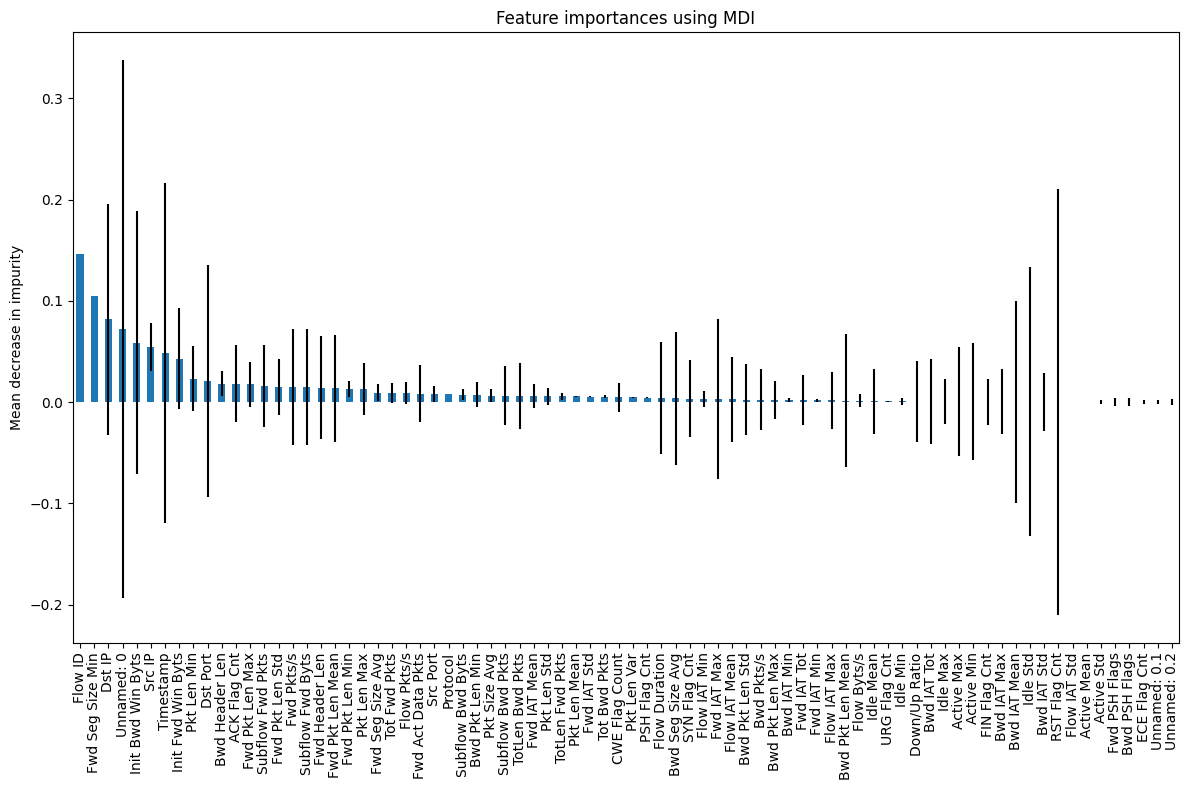

In [18]:
# Plot the feature importances
fig, ax = plt.subplots(figsize=(12,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [19]:
# Calculate 80% of the total number of features
num_features = X.shape[1]
k_features = int(num_features * 0.8)  
k_features

62

In [26]:
# Select top features (example: select top 80%)
top_k_features = forest_importances.head(k_features).index.tolist()

# Create a new DataFrame with only the top features
X_selected_df = df[top_k_features]
X_selected_df

,Flow ID,Fwd Seg Size Min,Dst IP,Unnamed: 0,Init Bwd Win Byts,Src IP,Timestamp,Init Fwd Win Byts,Pkt Len Min,Dst Port,...,Fwd IAT Min,Flow IAT Max,Bwd Pkt Len Mean,Flow Byts/s,Idle Mean,URG Flag Cnt,Idle Min,Down/Up Ratio,Bwd IAT Tot,Idle Max
0,0.328101,0.454545,0.604403,0.091080,0.474380,0.239987,0.246193,0.125015,0.000000,0.006760,...,1.527299e-06,0.083439,0.116214,6.676626e-08,0.083017,0.0,0.081228,0.000000,0.504109,0.083439
1,0.245482,0.181818,0.223591,0.624611,0.000000,0.288850,0.214860,0.000000,0.054569,0.000809,...,0.000000e+00,0.000015,0.051639,8.287964e-05,0.000000,0.0,0.000000,0.012346,0.000000,0.000000
2,0.084343,0.000000,0.214884,0.032264,0.007950,0.446652,0.083647,0.000000,0.000000,0.006760,...,2.503769e-08,0.083531,0.115361,1.127869e-07,0.080068,0.0,0.043356,0.012346,0.923738,0.083531
3,0.640548,0.000000,0.328405,0.297427,0.003235,0.300064,0.167571,0.000000,0.000000,0.576220,...,1.418803e-07,0.036297,0.040329,2.811327e-07,0.000000,0.0,0.000000,0.012346,0.036837,0.000000
4,0.010234,0.454545,0.261212,0.445803,0.959061,0.170939,0.905422,0.125015,0.000000,0.051714,...,1.719255e-06,0.007948,0.103213,1.402604e-06,0.000000,0.0,0.000000,0.000000,0.014867,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172004,0.880275,0.000000,0.328569,0.241651,0.500015,0.300384,0.973918,0.000000,0.000000,0.846522,...,2.086475e-07,0.000312,0.041585,3.044196e-05,0.000000,0.0,0.000000,0.000000,0.000314,0.000000
172005,0.172553,0.181818,0.223591,0.155045,0.000000,0.264819,0.820418,0.000000,0.038071,0.000809,...,0.000000e+00,0.000113,0.060322,1.155892e-05,0.000000,0.0,0.000000,0.012346,0.000000,0.000000
172006,0.865995,0.000000,0.328076,0.164479,0.500015,0.300384,0.931253,0.000000,0.000000,0.909101,...,1.836098e-07,0.000005,0.053162,1.081377e-03,0.000000,0.0,0.000000,0.000000,0.000008,0.000000
172007,0.360296,0.454545,0.482011,0.348366,0.002701,0.247997,0.861877,0.125015,0.000000,0.006760,...,1.093313e-06,0.484614,0.154834,3.573522e-08,0.484363,0.0,0.484112,0.000000,0.975199,0.484614


In [27]:
X_selected_df.to_csv("RandomForestImportance.csv")